In [3]:
# importing libraries and modules
from selenium import webdriver
import time
import os
import requests
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.support.select import Select
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.common.by import By
from selenium.webdriver.support import expected_conditions as EC
from selenium.common.exceptions import TimeoutException

s = Service(r"C:\Users\hari9\Desktop\SCTP Junior Data Engineer\Interim Project\chromedriver.exe")
driver = webdriver.Chrome(service=s)


In [5]:
 def extract(page):
    url = f'https://www.foundit.sg/srp/results?start={page}&sort=1&limit=15&query=%22data+engineer%22&locations=Singapore'
    driver.get(url)
    driver.implicitly_wait(2)
    return driver.page_source  # Return the page source


def transform(page_source):
    
    job_cards = driver.find_elements(By.XPATH, '//div[contains(@class, "srpResultCardContainer")]')

    for card in job_cards:
          try:

            job_title = card.find_element(By.XPATH, ".//div[@class='jobTitle']").text.strip()
            
            company_name = card.find_element(By.XPATH, ".//div[contains(@class, 'companyName') or contains(@class, 'colorPrimary')]").text
        
            job_details = card.find_element(By.XPATH,'.//div[@class="details"]').text
        
            # Extracting skills
            skills_elements = card.find_elements(By.XPATH,'.//div[@class="skillTitle"]')
            skills = skills = ', '.join([skill.text.strip() for skill in skills_elements if skill.text.strip()])
        
            time = card.find_element(By.XPATH,'.//div[@class="jobAddedTime"]').text
        
            years = card.find_element(By.CSS_SELECTOR, "div.cardBody > div:nth-child(3) > div.details").text
        
        
            # Extracting salary information
            salary_element = card.find_elements(By.XPATH, ".//div[contains(@class, 'details') and contains(text(), 'SGD')]")
            if salary_element:
                salary = salary_element[0].text
            else:
                salary = "Not specified"  
            
                      
                        
#             Store job data in a dictionary
            job = {
                "Job Title": job_title,
                "Company Name": company_name,
                "Job Details": job_details,
                "Skills": skills,
                "Time" : time,
                "Years of Exp" : years,
                "Salary" : salary
                         }
            joblist.append(job)
            
          except NoSuchElementException:
              print("Some data not found in card. Skipping this card.")
        
          except TimeoutException:
              print("Timed out waiting for company name element.")
                             
joblist = []

for i in range(0,210,15):
    print(f'Getting list,{i}')
    page_source = extract(i)
    transform(page_source)
   

df0 =pd.DataFrame(joblist)
df0.index = ['jd{:03d}'.format(i+1) for i in range(len(df0))]
df0.to_csv('foundit_joblist_all.csv')

# Use %store magic command to store the DataFrame
%store df0

# Close the driver
driver.quit()


Getting list,0
Getting list,15
Getting list,30
Getting list,45
Getting list,60
Getting list,75
Getting list,90
Getting list,105
Getting list,120
Getting list,135
Getting list,150
Getting list,165
Getting list,180
Getting list,195
Stored 'df1' (DataFrame)


In [45]:
#Change the format
import pandas as pd
#read csv
df1 = pd.read_csv('raw_datalist_22March.csv')
df1 = df1.drop(df1.columns[0], axis=1)

# Changing the index to 'JD001', 'JD002', etc.
df1.index= ['JD{:03d}'.format(i+1) for i in range(len(df1))]

# Assigning column header 'Job ID' to the index
df1.index.name ='Job ID'

# Remove unnecessary commas at the end of each string in the 'Skills' column
df1['Skills'] = df1['Skills'].str.rstrip(', ')
print(df1)
df1.to_csv('2.csv')
%store df1


                                                Job Title  \
Job ID                                                      
JD001                     Trainee to Junior Data Engineer   
JD002     Big Data Engineer - Hortonworks Hadoop Cloudera   
JD003                                       Data Engineer   
JD004                     Data Engineer/Reporting Analyst   
JD005                                       Data Engineer   
...                                                   ...   
JD206                             Senior Manager - AI/IOT   
JD207                   Reporting and Analytics Developer   
JD208   Junior Data Engineering Consultant - Graduate ...   
JD209                               Data Solution Manager   
JD210   Digital, Cloud, Data - Data Engineering Lead (...   

                               Company Name              Job Details  \
Job ID                                                                 
JD001                      Luxoft India Llp                Ful

In [2]:
#filter out unnecessary data
# Use %store magic command to retrieve the DataFrame
%store -r df1

# Remove duplicates
df1 = df1.drop_duplicates()
# Print count of df1 index
print("Count of unique index:", len(df1.index))



# Keep rows where the "Skills" column string count is more than zero
df2 = df1[df1['Skills'].str.len() > 0]

print(df1[~(df1['Skills'].str.len() > 0)].index)

# Filter out rows where the "Skills" column has more than 3 words or does not contain a comma
df3 = df2[(df2['Skills'].str.split().apply(len) <= 2) | (df2['Skills'].str.contains(','))]

print(df2[(~((df2['Skills'].str.split().apply(len) <= 2) | (df2['Skills'].str.contains(','))))].index)
df3.to_csv('3')

#store df3
%store df3










Count of unique index: 179
Number of 'Not Specified' entries: 0
Index(['JD002'], dtype='object', name='Job ID')
Stored 'df3' (DataFrame)


In [28]:
print(df3)

                                                Job Title  \
Job ID                                                      
JD001                     Trainee to Junior Data Engineer   
JD003                                       Data Engineer   
JD004                     Data Engineer/Reporting Analyst   
JD005                                       Data Engineer   
JD006              Lead Data Engineer - MS Power Platform   
...                                                   ...   
JD206                             Senior Manager - AI/IOT   
JD207                   Reporting and Analytics Developer   
JD208   Junior Data Engineering Consultant - Graduate ...   
JD209                               Data Solution Manager   
JD210   Digital, Cloud, Data - Data Engineering Lead (...   

                               Company Name              Job Details  \
Job ID                                                                 
JD001                      Luxoft India Llp                Ful

In [1]:
%%script false
# Define a function to add borders to DataFrame
def border_style(data):
    return 'border: 1px solid black;'

# Apply border style to DataFrame
styled_df = unique_df1.style.applymap(border_style)

# Display the DataFrame with borders
styled_df


Couldn't find program: 'false'


In [5]:
from pg_credentials2 import DBinfo
print(dir(DBinfo))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', 'connection_string']


In [220]:
import psycopg2
from pg_credentials4 import DBinfo

# Retrieve connection parameters
connection_string = DBinfo.connection_string

try:
    # Establish a connection and create a cursor using a context manager
    with psycopg2.connect(connection_string) as conn:
        with conn.cursor() as cursor:
            # Create the table fulljoblist if it doesn't exist
            create_fulljoblist_script = ''' 
            CREATE TABLE IF NOT EXISTS fulljoblist (
                job_id VARCHAR  PRIMARY KEY,
                job_title VARCHAR,
                company_name VARCHAR,
                job_details VARCHAR,
                skills VARCHAR,
                time VARCHAR,
                years_of_exp VARCHAR,
                salary VARCHAR
            );
            '''
            cursor.execute(create_fulljoblist_script)
            
            # Create the table skills_list if it doesn't exist
            create_skills_list_script = ''' 
            CREATE TABLE IF NOT EXISTS skills_list (
                id SERIAL PRIMARY KEY,
                job_id VARCHAR,
                skills VARCHAR,
                FOREIGN KEY (job_id) REFERENCES fulljoblist(job_id)
            );
            '''
            cursor.execute(create_skills_list_script)
        
        # Commit changes if necessary
        conn.commit()

except psycopg2.Error as e:
    print("Error:", e)



In [221]:
#retrive df3
%store -r df3
# Convert DataFrame to list of tuples
data = [(index,) + tuple(row) for index, row in df3.iterrows()]

try:
    # Establish a connection and create a cursor using a context manager
    with psycopg2.connect(connection_string) as conn:
        with conn.cursor() as cursor:
            # Insert data into the table
            insert_query = '''
            INSERT INTO fulljoblist(job_id,job_title, company_name, job_details, skills, time, years_of_exp, salary)
            VALUES (%s, %s, %s, %s, %s, %s, %s, %s);

            '''
            cursor.executemany(insert_query, data)
        
        # Commit changes if necessary
        conn.commit()

except psycopg2.Error as e:
    print("Error:", e)


Error: duplicate key value violates unique constraint "fulljoblist_pkey"
DETAIL:  Key (job_id)=(JD001) already exists.



In [4]:
#retrive df3
%store -r df3

# Split the 'Skills' column by comma and explode it to create multiple rows
df4 = df3.assign(Skills=df3['Skills'].str.split(',')).explode('Skills')

# Remove leading and trailing spaces from the exploded data
df4['Skills'] = df4['Skills'].str.strip()

# Print the transformed DataFrame (optional)
print(df4['Skills'])
df4.to_csv('5')
%store df4

Job ID
JD001             Data Scientist
JD003                a/b testing
JD003               Econometrics
JD003                    Pricing
JD003                     Python
                  ...           
JD209         Advertising Design
JD209    Engineering Mathematics
JD210                 Databricks
JD210                    Pyspark
JD210                      Spark
Name: Skills, Length: 785, dtype: object
Stored 'df4' (DataFrame)


In [216]:
%store -r df4
df5 = df4.copy()
df5['Skills'] = df5['Skills'].str.replace('Apache Pyspark|Spark|Apache Spark|pyspark', 'Apache Spark/Pyspark', case=False, regex=True)
df5['Skills'] = df5['Skills'].str.replace('Hadoop Database', 'Hadoop', case=False, regex=True)
df5['Skills'] = df5['Skills'].str.replace('Microsoft Azure', 'Azure', case=False, regex=True)
df5['Skills'] = df5['Skills'].str.replace('Azure Machine Learning|ai/ml|aws & azure machine learning|ai specialist/machines learning|machines learning|Machine Learning/ai specialist', 'Machine Learning', case=False, regex=True)
df5['Skills'] = df5['Skills'].str.replace('ETL Data engineer|extract/transform/load|ELT', 'Etl', case=False, regex=True)
df5['Skills'] = df5['Skills'].str.replace(r'\bJ2EE\b', 'Java J2ee', case=False, regex=True)
df5['Skills'] = df5['Skills'].str.replace('data pipelines', 'Pipelines', case=False, regex=True)

# Convert all phrases and words in 'Skills' column to sentence case
df5['Skills'] = df5['Skills'].str.title()

df5.to_csv('6.csv')
%store df5

Stored 'df5' (DataFrame)


In [69]:
from nltk.stem import PorterStemmer

# Initialize Porter Stemmer
stemmer = PorterStemmer()

# Create a dictionary to hold grouped words
grouped_words = {}

# Group words by their stems
for index, row in df5.iterrows():
    word = row['Skills']  # Replace 'your_column_name' with the actual column name containing phrases
    stem = stemmer.stem(word)
    if stem in grouped_words:
        grouped_words[stem].append(word)
    else:
        grouped_words[stem] = [word]

# Print grouped words with numbered stems
for i, (stem, words) in enumerate(grouped_words.items(), start=1):
    print(f"Stem {i}: {stem}")
    print(f"Words: {words}")
    print()  # Empty line for separation




Stem 1: data scientist
Words: ['Data Scientist', 'Data Scientist']

Stem 2: a/b test
Words: ['a/b testing']

Stem 3: econometr
Words: ['Econometrics']

Stem 4: price
Words: ['Pricing']

Stem 5: python
Words: ['Python', 'python', 'python', 'python', 'python', 'Python', 'Python']

Stem 6: machine learn
Words: ['Machine Learning', 'Machine Learning', 'Machine Learning', 'Machine Learning', 'Machine Learning', 'Machine Learning', 'Machine Learning', 'Machine Learning', 'Machine Learning', 'Machine Learning', 'Machine Learning', 'Machine Learning', 'Machine Learning', 'Machine Learning', 'Machine Learning', 'Machine Learning', 'Machine Learning', 'Machine Learning', 'Machine Learning', 'Machine Learning', 'Machine Learning', 'Machine Learning', 'Machine Learning', 'Machine Learning', 'Machine Learning', 'Machine Learning', 'Machine Learning']

Stem 7: tablet
Words: ['Tablets']

Stem 8: power bi
Words: ['Power Bi', 'Power Bi']

Stem 9: apache spark/pyspark
Words: ['Apache Spark/Pyspark', 'Ap

In [219]:
# Retrieve df5
%store -r df5

# Convert DataFrame to list of tuples containing index and 'Skills' column
data = [(index, row['Skills']) for index, row in df5.iterrows()]

try:
    # Establish a connection and create a cursor using a context manager
    with psycopg2.connect(connection_string) as conn:
        with conn.cursor() as cursor:
            # Insert data into the table
            insert_query = '''
            INSERT INTO skills_list(job_id, skills)
            VALUES (%s, %s);
            '''
            cursor.executemany(insert_query, data)
        
        # Commit changes if necessary
        conn.commit()

except psycopg2.Error as e:
    print("Error:", e)


                   skills  skill_count
0               Pipelines           74
1                   Azure           38
2        Machine Learning           27
3    Apache Spark/Pyspark           23
4                Big Data           22
5                  Hadoop           22
6   Business Intelligence           22
7           Data Analysis           19
8           Visualization           18
9                 Factory           14
10                    Etl           14
11                Tableau           13
12                    Sql           13
13            Reliability           12
14                  Scala           11


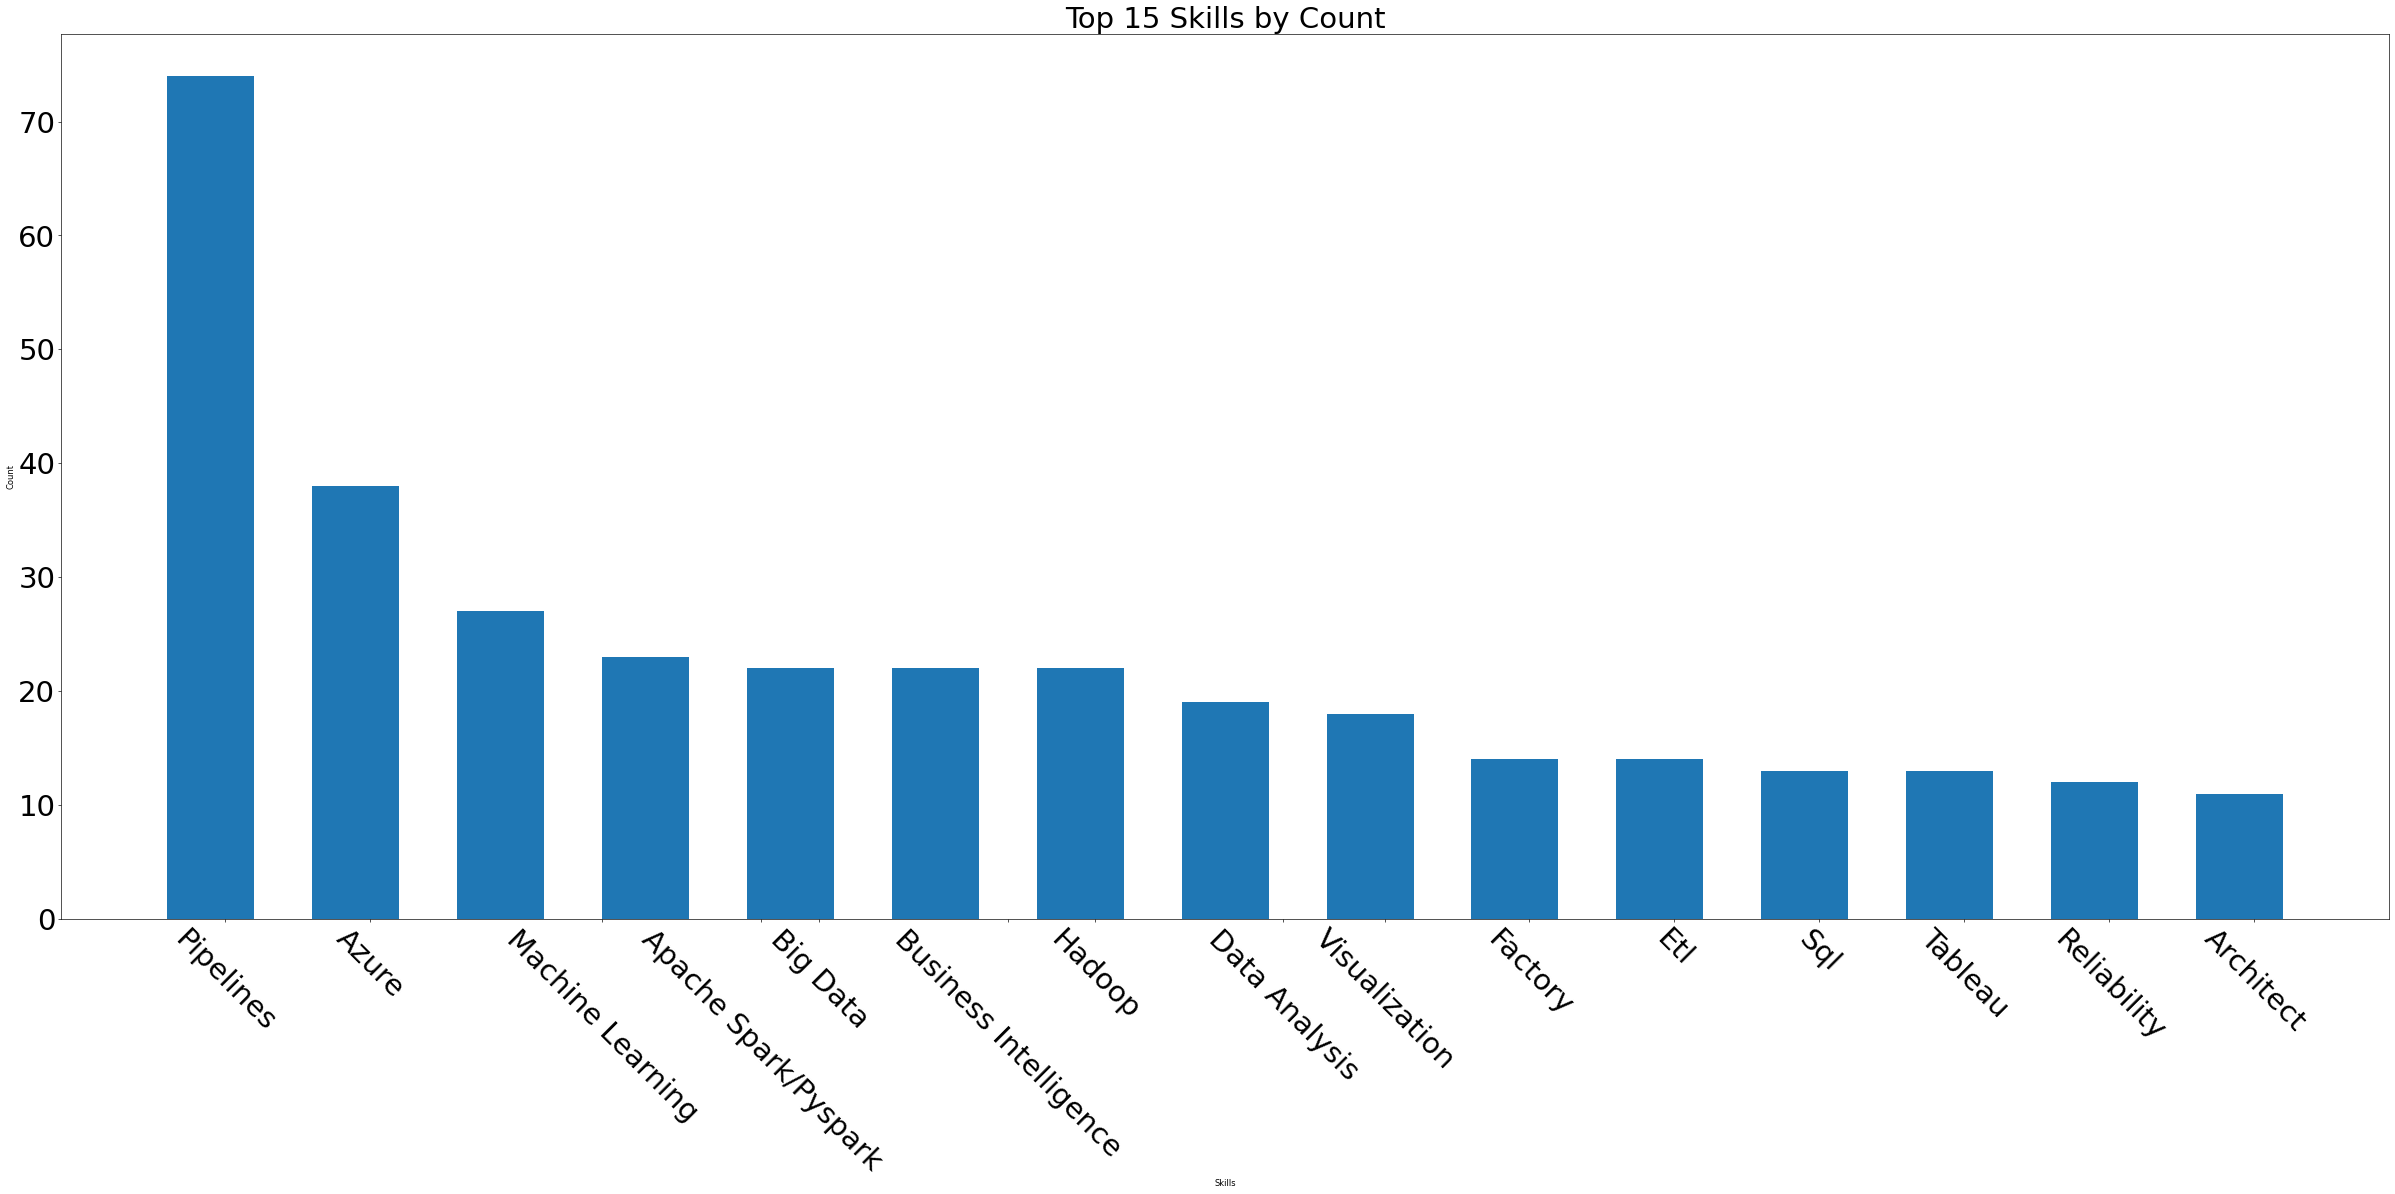

In [222]:
from sqlalchemy import create_engine
import pandas as pd
import matplotlib.pyplot as plt

# Define the database connection string
connection_string = DBinfo.connection_string

# Create a SQLAlchemy engine
engine = create_engine(connection_string)

# Define the SQL query
query = "SELECT * FROM skills_count_view ORDER BY skill_count DESC LIMIT 15;"

# Execute the query and load the result into a pandas DataFrame
df6 = pd.read_sql_query(query, engine)

# Close the SQLAlchemy engine
engine.dispose()

# Display the retrieved data
print(df6)

# Plot the data
plt.figure(figsize=(40, 20))
bars = plt.bar(df['skills'], df['skill_count'], width=0.6)
plt.xlabel('Skills')
plt.ylabel('Count')
plt.title('Top 15 Skills by Count',fontsize=35)

# Adjust the font size of the x-axis tick labels
plt.xticks(rotation=-45, fontsize=35)  # Adjust the fontsize as needed
plt.yticks(fontsize=35)

# Manually set the x-axis tick positions
tick_positions = [i + 0.1 for i in range(len(df['skills']))]
# Adjust the position of just the 3rd tick label
tick_positions[2] += 0.6
tick_positions[3] += 0.7
tick_positions[4] += 0.1
tick_positions[5] += 0.4
tick_positions[7] += 0.3

plt.xticks(tick_positions, df['skills'])

plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

